### 

Cancer is a leading cause of death worldwide, responsible for one out of every six fatalities.
 Breast cancer is the most common type, with around 2.90 million women diagnosed annually and claiming the lives of around 40,920 women in 2018.
Machine Learning (ML) can identify patterns in data and predict whether cancer is malignant or benign. 
ML uses features such as clump thickness, and uniformity of cell shape, age and family history, to improve the accuracy of breast cancer prediction.
This project is my implementation of the Breast Cancer Diagnosis framework proposed by Aamir et al. in 2022.
https://doi.org/10.1155/2022/5869529



### 

The project is divided into two parts:
1. Data collection and preprocessing
2. Model training and evaluation
 
### 

Data collection and preprocessing
 
The data is collected from UCI Machine Learning Repository. The dataset is split into training and testing sets.
This data is from a well curated dataset and has already been preprossed. Nans,missing values and outliers are removed.

###

Feature Extraction

Some features do not have as much importance as others. For example, the number of cells in the breast tissue might  not be as important as the clump thickness. These features must be removed from the dataset before training the model to reduce the dimensionality  and complexity of the data. This is done through recursive feature elimination, which removes features that are not significantly  correlated with the target variable. The features are then removed one by one, starting with the least important feature. Also correclation between features is checked to see if it is significant.
After extraction the data is scaled using z-score normalization. This is done to ensure that all features have a similar range of values. After normalization, the data is split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the model's performance.

 
### 

Model training and evaluation
 
The model is trained using the training set. The model is then evaluated on the testing set using various metrics such as accuracy, precision, recall, and F1 score. In this project two models are used, a multilayer perceptron model and a random forest model with cross-validation. The results of the evaluation are presented in the following table:

[Table 1: Model performance metrics]
| Model | Accuracy | Precision | Recall | F1 Score |
|-------|----------|-----------|--------|----------|
| MLP | 92.1 | 0.92 | 0.92 | 0.92 |
| Random Forest | 92.9 | 0.93 | 0.93 | 0.93 |


### 

Conclusion
 
This project demonstrates the effectiveness of ML in breast cancer diagnosis. The model achieves high accuracy and precision, making it a valuable tool for early detection and treatment of breast cancer.The use of different hyperparameters may be required to optimize the model's performance. Further research and development in this area can lead to more accurate and effective diagnosis, ultimately improving patient outcomes.

In [67]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [2]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_theme(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [3]:
X = pd.read_csv('./features.csv')
y = pd.read_csv('./targets.csv')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [3]:
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

# using plotly to plot the boxplot
X.iplot(kind='box', title="Boxplots of Features (Unscaled)")

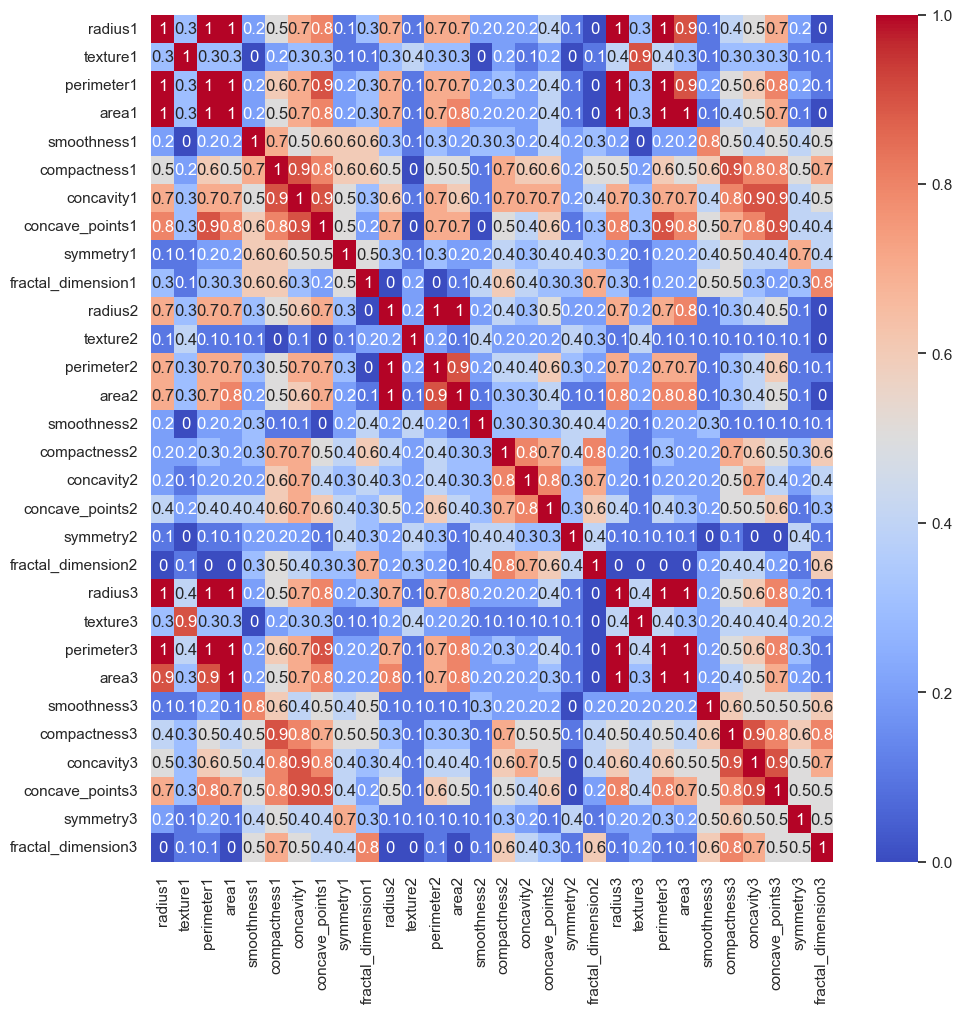

In [4]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs().round(1)

#### Plot the correlation matrix
plt.figure(figsize=(11, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [5]:
#### Find features with correlation greater than a threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for  column in upper.columns if any(upper[column] > threshold)]
#### Drop highly correlated features
X_reduced = X.drop(columns=to_drop)

print("Reduced features after correlation-based selection:", X_reduced.columns.tolist())
print("Number of Features", len(X_reduced.columns))



Reduced features after correlation-based selection: ['radius1', 'texture1', 'smoothness1', 'compactness1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'smoothness3', 'symmetry3', 'fractal_dimension3']
Number of Features 17


In [6]:
#### Initialize the model (Logistic Regression used as an example)
model = LogisticRegression()

#### Initialize RFE
rfe = RFE(model, n_features_to_select=11)  # Adjust n_features_to_select as needed

#### Fit RFE
rfe = rfe.fit(X_reduced, y.values.ravel())

#### Get the selected features
selected_features = X_reduced.columns[rfe.support_]

print("Selected features after RFE:", selected_features.tolist())
print("Selected features after RFE:", len(selected_features))



Selected features after RFE: ['radius1', 'smoothness1', 'compactness1', 'symmetry1', 'radius2', 'texture2', 'compactness2', 'concavity2', 'smoothness3', 'symmetry3', 'fractal_dimension3']
Selected features after RFE: 11


In [7]:

X_reduced = X_reduced[selected_features]


X_reduced = X_reduced.dropna()



In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [9]:
labels = LabelEncoder().fit_transform((np.array(y)).ravel())

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2,random_state=42)


In [18]:

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 4. Initialize the MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.00001,
                    hidden_layer_sizes=(5, 3), random_state=1, max_iter=2000)

# 5. Train the model
clf.fit(X_train, np.array(y_train).ravel())
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
# 6. Make predictions on the test data
y_pred = clf.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 8. Detailed evaluation
print("Cross-validation scores:", cv_scores)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 92.11%
Cross-validation scores: [0.97826087 0.93478261 0.93478261 0.93478261 0.95652174 1.
 0.95555556 0.93333333 0.95555556 0.93333333]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Confusion Matrix:
 [[65  6]
 [ 3 40]]


In [19]:
# Initialize the logistic regression model
model = RandomForestRegressor(n_estimators=100,max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Predict labels for the test data
y_pred = model.predict(X_test)
y_pred = y_pred.round(0).astype(int)


mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Root mean squared error:", mse)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 8. Detailed evaluation
print("Cross-validation scores:", cv_scores)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Cross-validation scores: [0.79412502 0.84942548 0.63723977 0.60739947 0.80913933 0.8930632
 0.81094695 0.42955916 0.93710677 0.54654391]
Mean cross-validation score: 0.7314549066625137
Root mean squared error: 0.07017543859649122
Accuracy: 92.98%
Cross-validation scores: [0.79412502 0.84942548 0.63723977 0.60739947 0.80913933 0.8930632
 0.81094695 0.42955916 0.93710677 0.54654391]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
 [[67  4]
 [ 4 39]]
